In [595]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import io

In [596]:
# Download the CSV using requests
url = "https://data.transportation.gov/api/views/keg4-3bc2/rows.csv?accessType=DOWNLOAD"
response = requests.get(url)

# Load the CSV content into a pandas DataFrame
data = pd.read_csv(io.StringIO(response.text))

# Convert the 'Point' column into geometry
data['geometry'] = data['Point'].apply(loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

gdf.drop(columns=['Point'], inplace=True)

gdf.tail()


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,geometry
396396,Portland,Maine,101,US-Canada Border,Apr 1996,Rail Containers Loaded,0,43.659,-70.243,POINT (-70.24306 43.65944)
396397,Trout River,New York,715,US-Canada Border,Oct 1997,Rail Containers Loaded,0,44.992,-74.308,POINT (-74.30817 44.99206)
396398,Raymond,Montana,3301,US-Canada Border,Jul 1996,Trains,0,48.999,-104.574,POINT (-104.57433 48.99919)
396399,Westhope,North Dakota,3419,US-Canada Border,Mar 1996,Trains,0,49.000,-101.017,POINT (-101.01728 48.99961)
396400,Boundary,Washington,3015,US-Canada Border,Jul 1997,Personal Vehicles,5028,49.001,-117.628,POINT (-117.62758 49.00075)


In [597]:
gdf.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,geometry
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.01898 26.40393)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.92761 29.32678)
2,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.73133 48.99997)
3,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.25792 48.99725)
4,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.33545 31.67313)


In [598]:
# Convert date column to datetime format
gdf['Date'] = pd.to_datetime(gdf['Date'])
# Create new columns
gdf['month'] = gdf['Date'].dt.month
gdf['year'] = gdf['Date'].dt.year

# gdf.drop(columns=['Date'], inplace=True)

gdf.head()

C:\Users\tarun\AppData\Local\Temp\ipykernel_17528\2864438600.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf['Date'] = pd.to_datetime(gdf['Date'])


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,geometry,month,year
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,Buses,46,26.404,-99.019,POINT (-99.01898 26.40393),12,2023
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,Trucks,6552,29.327,-100.928,POINT (-100.92761 29.32678),12,2023
2,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.73133 48.99997),1,2024
3,Whitlash,Montana,3321,US-Canada Border,2024-01-01,Personal Vehicles,29,48.997,-111.258,POINT (-111.25792 48.99725),1,2024
4,Ysleta,Texas,2401,US-Mexico Border,2024-01-01,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.33545 31.67313),1,2024


In [599]:
gdf = gdf[gdf['State'] != 'Alaska']

In [600]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 383601 entries, 0 to 396400
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  383601 non-null  object        
 1   State      383601 non-null  object        
 2   Port Code  383601 non-null  int64         
 3   Border     383601 non-null  object        
 4   Date       383601 non-null  datetime64[ns]
 5   Measure    383601 non-null  object        
 6   Value      383601 non-null  int64         
 7   Latitude   383601 non-null  float64       
 8   Longitude  383601 non-null  float64       
 9   geometry   383601 non-null  geometry      
 10  month      383601 non-null  int32         
 11  year       383601 non-null  int32         
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(2), object(4)
memory usage: 35.1+ MB


In [601]:
gdf.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
geometry     0
month        0
year         0
dtype: int64

In [602]:
gdf.describe()

,Port Code,Date,Value,Latitude,Longitude,month,year
count,383601.000000,383601,3.836010e+05,383601.000000,383601.000000,383601.000000,383601.000000
mean,2424.403526,2009-02-13 01:55:19.189470464,2.979345e+04,43.446421,-98.497826,6.462460,2008.665673
min,101.000000,1996-01-01 00:00:00,0.000000e+00,25.952000,-123.431000,1.000000,1996.000000
25%,2303.000000,2002-08-01 00:00:00,0.000000e+00,42.332000,-112.788000,3.000000,2002.000000
50%,3010.000000,2008-11-01 00:00:00,1.560000e+02,47.360000,-101.017000,6.000000,2008.000000
75%,3403.000000,2015-02-01 00:00:00,3.193000e+03,49.000000,-84.361000,9.000000,2015.000000
max,3814.000000,2024-10-01 00:00:00,4.447374e+06,49.002000,-66.980000,12.000000,2024.000000
std,1218.016320,NaN,1.519617e+05,7.740366,17.244577,3.440675,7.778219


In [603]:
ports = gdf['Port Name'].unique()  # port names 
ports, len(ports)

(array(['Roma', 'Del Rio', 'Willow Creek', 'Whitlash', 'Ysleta', 'Warroad',
        'Wildhorse', 'Westhope', 'Sweetgrass', 'Brownsville', 'Sumas',
        'Madawaska', 'Calexico East', 'Pinecreek', 'Laurier', 'Laredo',
        'Frontier', 'Port Huron', 'Pembina', 'Fort Fairfield',
        'Trout River', 'Calais', 'Limestone', 'Nogales', 'Detroit',
        'Presidio', 'Santa Teresa', 'Champlain Rouses Point', 'Vanceboro',
        'El Paso', 'Hidalgo', 'Jackman', 'Alexandria Bay', 'Oroville',
        'Fortuna', 'Metaline Falls', 'Ogdensburg', 'Tornillo', 'Sherwood',
        'Hansboro', 'Van Buren', 'Eastport', 'Sasabe', 'Boundary',
        'Progreso', 'Rio Grande City', 'Danville', 'Portal', 'Raymond',
        'Turner', 'Dunseith', 'Blaine', 'Noonan', 'Baudette',
        'Highgate Springs', 'International Falls', 'Kenneth G Ward',
        'Roosville', 'Norton', 'Tecate', 'Grand Portage', 'Morgan',
        'Ambrose', 'Roseau', 'Massena', 'Port Angeles', 'Carbury',
        'Lukeville', 'Ea

In [604]:
states = gdf['State'].unique() # border states 
states, len(states)

(array(['Texas', 'Montana', 'Minnesota', 'North Dakota', 'Washington',
        'Maine', 'California', 'Michigan', 'New York', 'Arizona',
        'New Mexico', 'Idaho', 'Vermont'], dtype=object),
 13)

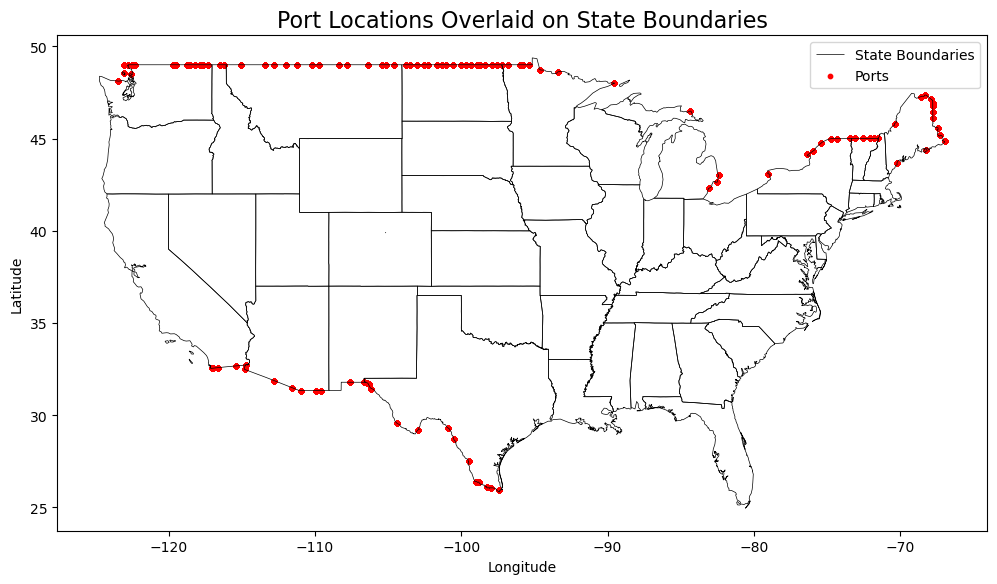

In [605]:
# Step 1: Load the county shapefile
county_shp_path = "US_COUNTY_SHPFILE/US_county_cont.shp"
county_gdf = gpd.read_file(county_shp_path)

# Step 2: Simplify to state boundaries
# Dissolve by state identifier (assuming "STATE_NAME" or similar exists in the shapefile)
state_gdf = county_gdf.dissolve(by="STATE_NAME")

# Ensure the CRS matches the ports GeoDataFrame
state_gdf = state_gdf.to_crs(gdf.crs)

# Step 3: Plot the state boundaries and overlay port locations
fig, ax = plt.subplots(figsize=(12, 8))

# Plot state boundaries (no county boundaries)
state_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label="State Boundaries")

# Overlay the port locations
gdf.plot(ax=ax, color="red", markersize=10, label="Ports")

# Add title, legend, and labels
plt.title("Port Locations Overlaid on State Boundaries", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

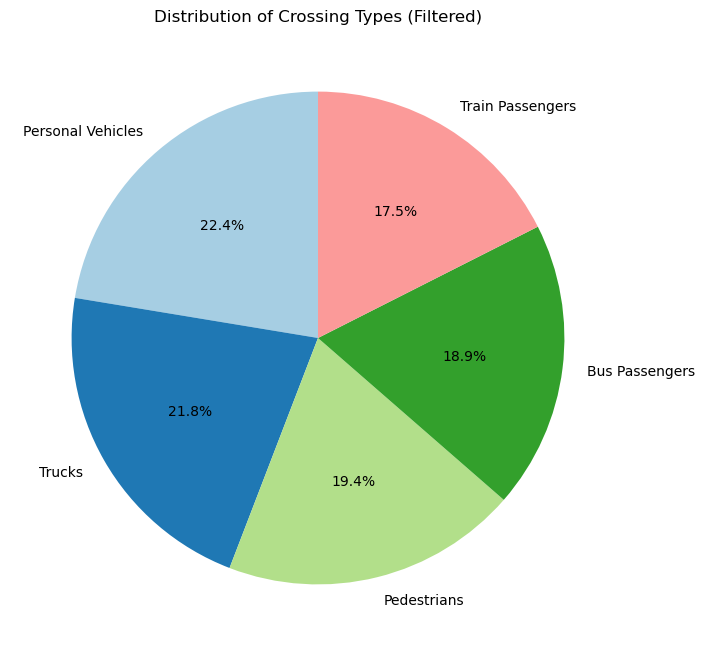

In [606]:
# Step 1: Filter the GeoDataFrame to include only the specified crossing types
selected_crossing_types = ['Pedestrians', 'Personal Vehicles', 'Train Passengers', 'Trucks', 'Bus Passengers']
filtered_gdf = gdf[gdf['Measure'].isin(selected_crossing_types)]

# Step 2: Count the occurrences of each crossing type
crossing_counts = filtered_gdf['Measure'].value_counts()

# Step 3: Plot a pie chart
fig, ax = plt.subplots(figsize=(10, 8))
crossing_counts.plot.pie(
    ax=ax,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start angle of pie chart
    colors=plt.cm.Paired.colors,  # Color palette
    ylabel='',  # Remove default ylabel
    title="Distribution of Crossing Types (Filtered)"
)

# Show the plot
plt.show()

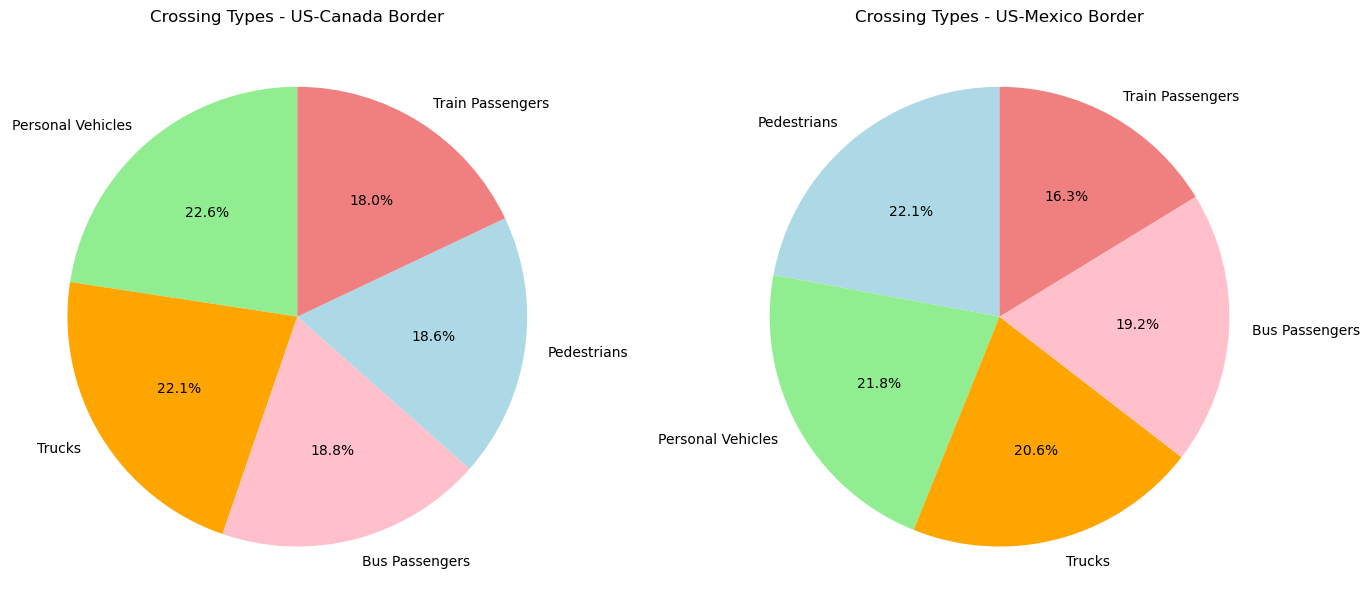

In [608]:
import matplotlib.pyplot as plt

# Step 1: Filter the data for US-Canada and US-Mexico borders
us_canada_gdf = filtered_gdf[filtered_gdf['Border'] == 'US-Canada Border']
us_mexico_gdf = filtered_gdf[filtered_gdf['Border'] == 'US-Mexico Border']

# Step 2: Count the occurrences of each crossing type for both borders
us_canada_counts = us_canada_gdf['Measure'].value_counts()
us_mexico_counts = us_mexico_gdf['Measure'].value_counts()

# Step 3: Define a fixed color mapping for the "Measure" categories
measure_categories = ['Pedestrians', 'Personal Vehicles', 'Train Passengers', 'Trucks', 'Bus Passengers']
# Assign a color to each category manually
color_mapping = {
    'Pedestrians': 'lightblue',
    'Personal Vehicles': 'lightgreen',
    'Train Passengers': 'lightcoral',
    'Trucks': 'orange',
    'Bus Passengers': 'pink'
}

# Step 4: Apply the color mapping to the counts
us_canada_colors = [color_mapping[measure] for measure in us_canada_counts.index]
us_mexico_colors = [color_mapping[measure] for measure in us_mexico_counts.index]

# Step 5: Create two separate pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# US-Canada Border Pie Chart
us_canada_counts.plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    startangle=90,
    colors=us_canada_colors,
    ylabel='',
    title="Crossing Types - US-Canada Border"
)

# US-Mexico Border Pie Chart
us_mexico_counts.plot.pie(
    ax=axes[1],
    autopct='%1.1f%%',
    startangle=90,
    colors=us_mexico_colors,
    ylabel='',
    title="Crossing Types - US-Mexico Border"
)

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

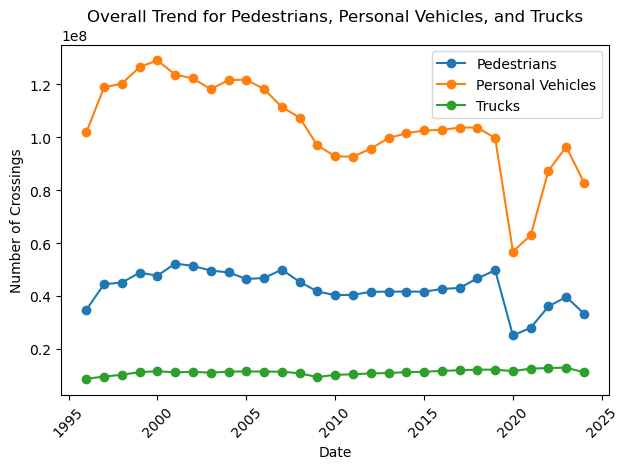

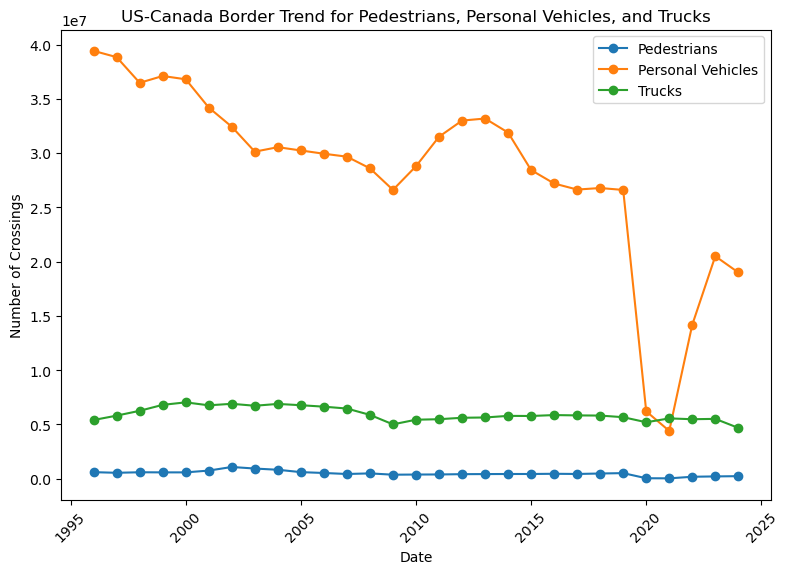

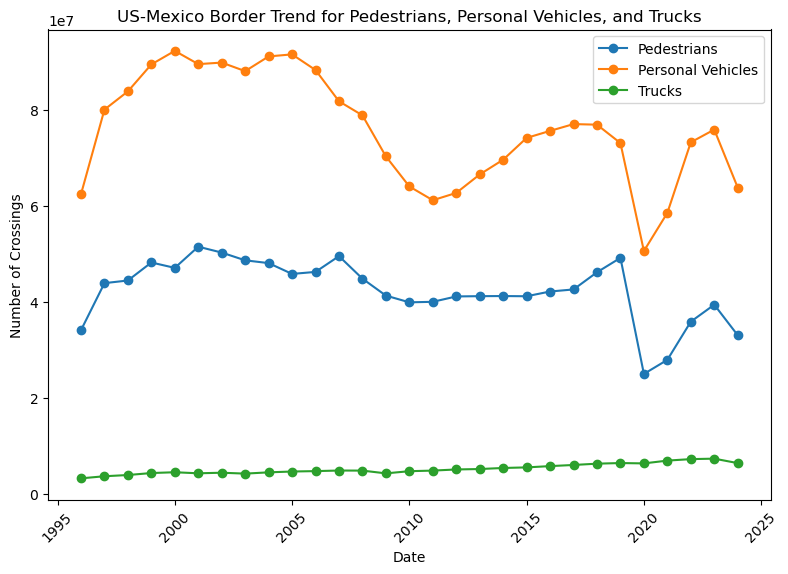

In [609]:
# Step 1: Filter the data for selected Measure categories
selected_measures = ['Pedestrians', 'Personal Vehicles', 'Trucks']
overall_data = filtered_gdf[filtered_gdf['Measure'].isin(selected_measures)]

# Step 2: Group by 'Date' and 'Measure', and sum the values for overall trend
overall_trend = overall_data.groupby(['year', 'Measure'])['Value'].sum().unstack().fillna(0)

# Step 3: Plot the overall trend chart
plt.figure(figsize=(8, 6))
overall_trend.plot(kind='line', marker='o')
plt.title('Overall Trend for Pedestrians, Personal Vehicles, and Trucks')
plt.ylabel('Number of Crossings')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Filter data for the US-Canada Border
us_canada_data = overall_data[overall_data['Border'] == 'US-Canada Border']
us_canada_trend = us_canada_data.groupby(['year', 'Measure'])['Value'].sum().unstack().fillna(0)

# Step 5: Plot the US-Canada Border trends
us_canada_trend.plot(kind='line', marker='o', figsize=(8, 6))
plt.title('US-Canada Border Trend for Pedestrians, Personal Vehicles, and Trucks')
plt.ylabel('Number of Crossings')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Filter data for the US-Mexico Border
us_mexico_data = overall_data[overall_data['Border'] == 'US-Mexico Border']
us_mexico_trend = us_mexico_data.groupby(['year', 'Measure'])['Value'].sum().unstack().fillna(0)

# Step 7: Plot the US-Mexico Border trends
us_mexico_trend.plot(kind='line', marker='o', figsize=(8, 6))
plt.title('US-Mexico Border Trend for Pedestrians, Personal Vehicles, and Trucks')
plt.ylabel('Number of Crossings')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [610]:
import matplotlib.pyplot as plt

# Step 1: Filter the data for selected Measure categories
selected_measures = ['Pedestrians', 'Personal Vehicles', 'Trucks']
filtered_data = filtered_gdf[filtered_gdf['Measure'].isin(selected_measures)]

# Step 2: Group data by 'Date', 'Measure', and 'Border', then sum the 'Value'
grouped_data = filtered_data.groupby(['year', 'Measure', 'Border'])['Value'].sum().unstack(fill_value=0)

# Step 3: Reset the index to make 'Date' a column
grouped_data = grouped_data.reset_index()

grouped_data


Border,year,Measure,US-Canada Border,US-Mexico Border
0,1996,Pedestrians,607206,34109364
1,1996,Personal Vehicles,39414446,62429373
2,1996,Trucks,5411763,3254084
3,1997,Pedestrians,549223,43911311
4,1997,Personal Vehicles,38835663,80052978
...,...,...,...,...
82,2023,Personal Vehicles,20500726,75891766
83,2023,Trucks,5515999,7356659
84,2024,Pedestrians,238596,33063842
85,2024,Personal Vehicles,19001950,63823074


Text(0.5, 1.0, 'Pedestrian Crossings')

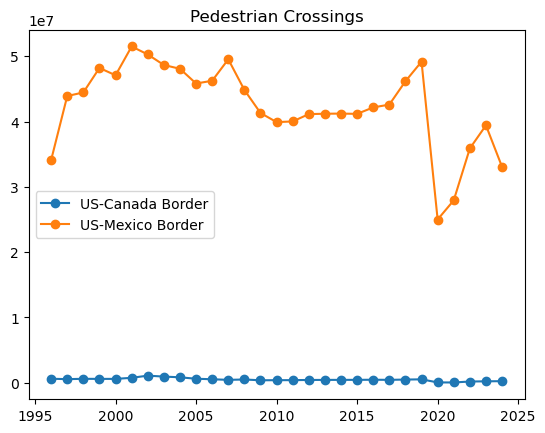

In [611]:
pedestrian_df = grouped_data[grouped_data['Measure'] == 'Pedestrians']

plt.plot(pedestrian_df['year'], pedestrian_df['US-Canada Border'], marker='o', label='US-Canada Border')
plt.plot(pedestrian_df['year'], pedestrian_df['US-Mexico Border'], marker='o', label='US-Mexico Border')
plt.legend()
plt.title("Pedestrian Crossings")

Text(0.5, 1.0, 'Truck Crossings')

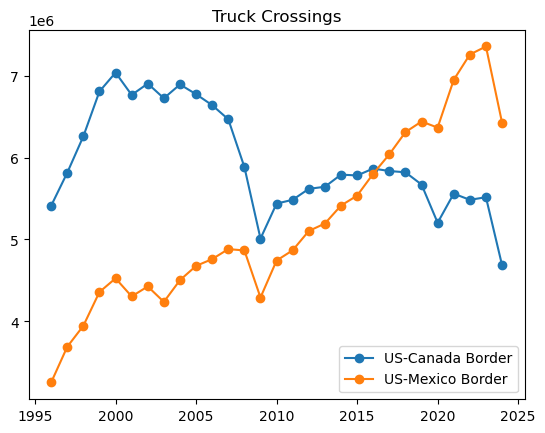

In [612]:
truck_df = grouped_data[grouped_data['Measure'] == 'Trucks']

plt.plot(pedestrian_df['year'], truck_df['US-Canada Border'], marker='o', label='US-Canada Border')
plt.plot(pedestrian_df['year'], truck_df['US-Mexico Border'], marker='o', label='US-Mexico Border')
plt.legend()
plt.title("Truck Crossings")

Text(0.5, 1.0, 'Personal Vehicle Crossings')

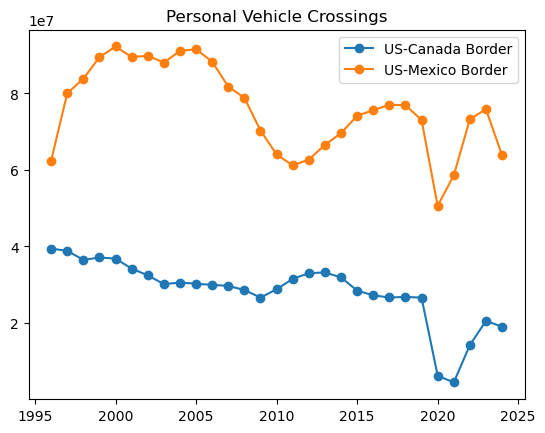

In [613]:
car_df = grouped_data[grouped_data['Measure'] == 'Personal Vehicles']

plt.plot(pedestrian_df['year'], car_df['US-Canada Border'], marker='o', label='US-Canada Border')
plt.plot(pedestrian_df['year'], car_df['US-Mexico Border'], marker='o', label='US-Mexico Border')
plt.legend()
plt.title("Personal Vehicle Crossings")

In [618]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import branca

# Apply filtering and create a copy for the filtered data
filtered_data_copy = filtered_data.copy()

filtered_data_copy = filtered_data_copy[
    (filtered_data_copy["Measure"].isin(["Pedestrians", "Personal Vehicles", "Trucks"])) &
    (filtered_data_copy['year'] > (max(filtered_data_copy['year']) - 8))
]

# Extract the top ports by volume for each year-month
top_ports = (
    filtered_data_copy.groupby(["year", "month", "Port Name"])["Value"]
    .sum()
    .reset_index()
    .sort_values(by=["year", "month", "Value"], ascending=[True, True, False])
    .groupby(["year", "month"])
    .head(30)
)

# Join back with filtered data copy to restrict to top ports
filtered_data_copy = filtered_data_copy.merge(
    top_ports[["year", "month", "Port Name"]],
    on=["year", "month", "Port Name"],
    how="inner"
)

# Prepare heatmap data for each measure (grouped by year-month)
heatmap_data = {}
for measure in ["Pedestrians", "Personal Vehicles", "Trucks"]:
    measure_data = filtered_data_copy[filtered_data_copy["Measure"] == measure]
    heatmap_data[measure] = [
        [
            [row["Latitude"], row["Longitude"], row["Value"]]
            for _, row in measure_data[(measure_data["year"] == year) & (measure_data["month"] == month)].iterrows()
        ]
        for year, month in sorted(
            measure_data[["year", "month"]].drop_duplicates().itertuples(index=False)
        )
    ]
    # Update the labels for the slider to include months
    heatmap_data[measure + "_labels"] = [
        f"{year}-{month:02d} ({measure})"
        for year, month in sorted(
            measure_data[["year", "month"]].drop_duplicates().itertuples(index=False)
        )
    ]

# Normalize the heatmap data
normalized_heatmap_data = {}
scaler = MinMaxScaler()

for measure, data in heatmap_data.items():
    if measure.endswith("_labels"):  # Skip the labels
        continue
    normalized_data_slices = []
    for slice_data in data:
        if len(slice_data) > 0:  # Avoid empty slices
            # Extract intensity values, normalize them, and reattach to coordinates
            slice_array = np.array(slice_data)
            coords = slice_array[:, :2]  # Extract coordinates
            intensities = slice_array[:, 2].reshape(-1, 1)  # Extract intensities
            normalized_intensities = scaler.fit_transform(intensities).flatten()  # Normalize
            normalized_slice = np.hstack([coords, normalized_intensities[:, None]])
            normalized_data_slices.append(normalized_slice.tolist())
        else:
            normalized_data_slices.append([])

    normalized_heatmap_data[measure] = normalized_data_slices
    normalized_heatmap_data[measure + "_labels"] = heatmap_data[measure + "_labels"]

# Calculate relative breakpoints for each measure based on monthly percentiles
measure_breaks = {}
for measure in ["Pedestrians", "Personal Vehicles", "Trucks"]:
    # Group by year and month
    grouped_data = filtered_data_copy[filtered_data_copy["Measure"] == measure].groupby(["year", "month"])["Value"]
    
    # Temporary storage for monthly breakpoints
    monthly_breaks = []

    for (year, month), values in grouped_data:
        lower_bound = np.percentile(values, 20)
        median = np.median(values)
        upper_bound = np.percentile(values, 80)
        monthly_breaks.append([
            lower_bound,
            median,
            upper_bound,
        ])

    monthly_breaks_array = np.array(monthly_breaks)
    averaged_breaks = np.mean(monthly_breaks_array, axis=0)  # Average along rows

    # print(averaged_breaks)
    
    # Round to the nearest 1000
    measure_breaks[measure] = [round(avg / 1000) * 1000 for avg in averaged_breaks]


# Define specific gradient colors for each measure
measure_gradients = {
    "Pedestrians": ["blue", "lightblue", "cyan"],
    "Personal Vehicles": ["green", "yellowgreen", "lime"],
    "Trucks": ["yellow", "orange", "red"],
}

# Function to add legends with stacked positioning in the top-left corner
def add_measure_legend(map_object, measure, breaks, colors, offset_index):
    vertical_offset = 10 + offset_index * 120  # Adjust vertical offset to avoid overlap
    legend_html = f"""
    <div style="
        position: fixed;
        top: {vertical_offset}px;
        left: 10px;
        width: 200px;
        height: auto;
        background-color: white;
        border: 2px solid grey;
        border-radius: 10px;
        padding: 10px;
        z-index:9999;
        font-size:14px;">
        <strong>{measure}</strong><br>
        <i style="background:{colors[0]}; width: 12px; height: 12px; display: inline-block;"></i>
        &lt; {breaks[0]:,}<br>
        <i style="background:{colors[1]}; width: 12px; height: 12px; display: inline-block;"></i>
        {breaks[0]:,} - {breaks[1]:,}<br>
        <i style="background:{colors[2]}; width: 12px; height: 12px; display: inline-block;"></i>
        &gt; {breaks[1]:,}<br>
    </div>
    """
    map_object.get_root().html.add_child(branca.element.Element(legend_html))

# Create the map
m = folium.Map(location=[39.5, -98.35], zoom_start=5)

# Add heatmap layers for each measure
for idx, (measure, data) in enumerate(normalized_heatmap_data.items()):
    if measure.endswith("_labels"):
        continue
    breaks = measure_breaks[measure]
    gradient_colors = measure_gradients[measure]
    HeatMapWithTime(
        data,
        name=f"{measure}",
        radius=70,
        auto_play=False,
        max_opacity=0.95,
        min_opacity=0.4,
        index=normalized_heatmap_data[measure + "_labels"],
        gradient={ 
            0.2: gradient_colors[0],
            0.5: gradient_colors[1],
            0.8: gradient_colors[2],
        },
    ).add_to(m)
    add_measure_legend(m, measure, breaks, gradient_colors, idx)

# Add layer control
folium.LayerControl().add_to(m)

# Save or display the map
m.save("interactive_map_monthly.html")
